# En este cuaderno crearemos un catálogo de las obras disponibles en la plataforma [Teatrix](https://www.teatrix.com/), analizaremos algunos de sus datos y finalmente extraeremos el listado en un archivo de Excel.

En primer lugar, importamos las librerías necesarias para obtener el código de la página y filtrarlo mediante expresiones regulares:

In [1]:
import requests
import re

Hacemos el pedido a la web. Si el valor de su estatus es igual a 200, quiere decir que hemos tenido éxito:

In [2]:
url = 'https://www.teatrix.com/'
request = requests.get(url)
request.status_code

200

A continuación obtenemos los nombres de las páginas que contienen cada una de las obras, ubicados en el texto luego de la expresión "video/".

In [3]:
pattern = 'video/(.+)">'
nombres = re.findall(pattern,request.text)
print(f'La página principal de Teatrix nos devuelve {len(nombres)} nombres de obras')

La página principal de Teatrix nos devuelve 446 nombres de obras


Cada nombre puede aparecer más de una vez en el código, por lo cual necesitamos eliminar los repetidos. Para esto convertimos nuestra lista en un set, estructura que no contiene más de una ocurrencia de cada objeto:

In [4]:
nombres = set(nombres)
print(f'Actualmente, Teatrix cuenta con {len(nombres)} obras en su catálogo.')

Actualmente, Teatrix cuenta con 178 obras en su catálogo.


Ahora creamos un diccionario con la expresión regular correspondiente a cada uno de los datos que queremos extraer:

In [5]:
obras_regex = {'titulo':'title">(.+)</h2','teatro':'origin">(.+)</span>',
               'anio':'date">(\d+)','sinopsis':'md">\s*(.+)',
               'duracion':'duration">(\d+)  min'}
elenco_regex = '"person">(.*?)\s<span\sclass="role">[(](.*?)[)]<'

Entonces ya podemos crear una lista que contenga nombre, teatro, año, duración, elenco y el link al trailer de cada una de las obras. Es posible que la siguiente celda tarde unos cuantos segundos en ejecutarse, ya que debe recorrer página por página y filtrar los datos que queremos en cada una de ellas:

In [6]:
data = [] #Primero creamos la lista que iremos llenando con los datos de cada obra.
for i in nombres: #Iniciamos un bucle que itere el proceso en la página de cada obra.
  url_obra = f'{url}video/{i}' 
  obra_data = {} #Creamos un diccionario vacío cada vez que se inicia un ciclo.
  while len(obra_data) < 1: #Repetimos el ciclo hasta asegurarnos de que obtuvimos
  #datos, ya que puede suceder que a veces el request devuelva un objeto vacío. 
    html = requests.get(url_obra)
    for nombre, regex in obras_regex.items():
      dato = re.findall(regex, html.text)
      if dato: #Si el dato en cuestión es hallado, lo agregamos al diccionario...
        obra_data[nombre] = dato[0] #...tomando el primer elemento para evitar corchetes.
  obra_data['elenco'] = re.findall(elenco_regex, html.text) #Del elenco queremos
  #la lista completa.
  obra_data['trailer'] = f'{url}ver/{i}' #El trailer podemos agregarlo sin necesidad
  #de recurrir a expresiones regulares.
  data.append(obra_data)

Vemos los primeros cinco elementos para comprobar que el proceso haya sido exitoso:

In [7]:
data[:4]

[{'anio': '1993',
  'duracion': '76',
  'elenco': [('Jorge Cavanet', 'Autoría'),
   ('Martín Clutet', 'Director'),
   ('María Aurelia Bisutti', 'Actriz '),
   ('Raúl Aubel', 'Actor'),
   ('Susana Ortiz', 'Actriz '),
   ('Pablo Echarri', 'Actor'),
   ('Pachi Armas', 'Actriz '),
   ('Magalí Moro', 'Actriz '),
   ('Celia Juarez', 'Actriz '),
   ('Pochi Grey', 'Actriz '),
   ('Regina Lamm', 'Actriz '),
   ('Martín Coria', 'Actor'),
   ('Adriana Gardiazabal', 'Actriz ')],
  'sinopsis': 'Un episodio de Alta Comedia, el histórico ciclo televisivo del viejo Canal 9 que fue -y es al día del hoy- el referente del teatro en la tele. Para nosotros es el más querido antecedente de Teatrix.</p>',
  'teatro': 'Canal 9',
  'titulo': 'ALTA COMEDIA: LA MARCA DEL ORILLO',
  'trailer': 'https://www.teatrix.com/ver/alta-comedia-la-marca-del-orillo'},
 {'anio': '2016',
  'duracion': '71',
  'elenco': [('Federico Mertens', 'Autoría'),
   ('Graciela Pal', 'Actriz '),
   ('Héctor Callori', 'Actor'),
   ('Josel

Antes de seguir importamos la librería Pandas, la cual nos ayudará a manipular los datos:

In [8]:
import pandas as pd

Ahora sí, creamos nuestro catálogo y lo revisamos tomando una muestra al azar:

In [9]:
catalogo = pd.DataFrame(data)
print(catalogo.shape)
catalogo.sample(5)

(178, 7)


,titulo,teatro,anio,sinopsis,duracion,elenco,trailer
28,DOñA DISPARATE Y BAMBUCO,CPM Multiescena,2019,Georgina Barbarossa vuelve como Doña Disparate...,60,"[(María Elena Walsh, Autoría), (Georgina Barba...",https://www.teatrix.com/ver/dona-disparate-y-b...
43,MUCHO RUIDO Y POCAS NUECES,Teatro La Comedia,2019,"Del siglo XVII al XXI en una sola escala, la c...",137,"[(William Shakespeare , Autoría), (Jorge Azurm...",https://www.teatrix.com/ver/mucho-ruido-y-poca...
3,EL BOTELLA,Centro Cultural 25 de mayo,2017,Que\r,95,"[(Francesca Lorito, Actriz ), (Manuel Pérez Er...",https://www.teatrix.com/ver/el-botella
12,EL SEñOR DEL BAñO,ND ATENEO,2016,"El unipersonal de Rudy Chernicof, con libro de...",67,"[(Daniel Dátola, Autoría), (Rudy Chernicof, Au...",https://www.teatrix.com/ver/el-senor-del-bano
46,THE PORTUGUESE KID,Broadway HD,2017,Una comedia vertiginosa que te atrapa desde la...,106,"[(John Patrick Shanley, Autoría), (David Horn,...",https://www.teatrix.com/ver/portuguese-kid


¿Coincide la cantidad de nombres que extrajimos al principio con la longitud del DataFrame?

In [10]:
#Si esta celda no devuelve nada es porque las cantidades efectivamente coinciden.
assert len(nombres) == len(catalogo), 'Las cantidades no coinciden'

¿Cuáles son las obras más viejas del catálogo?

In [11]:
catalogo[catalogo['anio'] == catalogo['anio'].min()]

,titulo,teatro,anio,sinopsis,duracion,elenco,trailer
14,ALTA COMEDIA: LA SANGRE DE LOS ORTIZ,Canal 9,1992,"Un episodio de Alta comedia, el histórico cicl...",61,"[(Patricia Ulanosky, Autoría), (Alberto Rinald...",https://www.teatrix.com/ver/alta-comedia-la-sa...
21,BRUJAS,Teatro Ateneo,1992,"Moria Casán, Graciela Dufau, Nora Cárpena, The...",102,"[(Santiago Moncada, Autoría), (Luis Agustoni, ...",https://www.teatrix.com/ver/brujas
73,ALTA COMEDIA: PERSONA NO GRATA,Canal 9,1992,"Un episodio de Alta comedia, el histórico cicl...",54,"[(Henrik Ibsen, Libro original), (Ruben Szuchm...",https://www.teatrix.com/ver/alta-comedia-perso...
77,ALTA COMEDIA: HOY DIGO BASTA,Canal 9,1992,"Un episodio de Alta Comedia, el histórico cicl...",74,"[(Juan Carlos Cernadas Lamadrid, Autoría), (Al...",https://www.teatrix.com/ver/alta-comedia-hoy-d...
150,ALTA COMEDIA: SEIS PERSONAJES EN BUSCA DE UN A...,Canal 9,1992,"Un episodio de Alta comedia, el histórico cicl...",64,"[(Luigi Pirandello, Libro original), (Elena An...",https://www.teatrix.com/ver/alta-comedia-seis-...
168,ALTA COMEDIA: SIN SALIDA,Canal 9,1992,"Un episodio de Alta comedia, el histórico cicl...",70,"[(Luigi Pirandello, Libro original), (Ricardo ...",https://www.teatrix.com/ver/alta-comedia-sin-s...


¿De qué años son la mayoría de las obras?

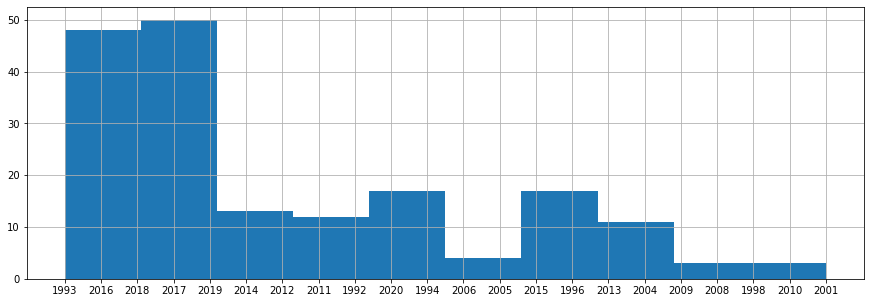

In [12]:
catalogo['anio'].hist(figsize=(15,5));

Ahora crearemos otro DataFrame para analizar la duración de las obras, eliminando los valores nulos, convirtiendo los minutos en datos operables y descartando aquellos que resulten anómalos:

In [13]:
df_dur = catalogo.dropna(subset=['duracion'])
df_dur.shape

(175, 7)

In [14]:
df_dur['duracion'] = df_dur['duracion'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
#Descartamos las obras que duren menos de 20 minutos, cifra arbitraria que tomamos
#como indicadora de datos anómalos:
df_dur = df_dur[df_dur['duracion'] > 20] 

¿Cuál es la obra más corta?

In [16]:
df_dur[df_dur['duracion'] == df_dur['duracion'].min()]

,titulo,teatro,anio,sinopsis,duracion,elenco,trailer
34,ISABEL DE GUEVARA,Centro cultural 25 de mayo,2018,Una obra de la prestigiosa Alicia Muño...,41,"[(Alicia Muñoz, Autoría), (María Esther Fernán...",https://www.teatrix.com/ver/isabel-de-guevara


¿Y la más larga?

In [17]:
df_dur[df_dur['duracion'] == df_dur['duracion'].max()]

,titulo,teatro,anio,sinopsis,duracion,elenco,trailer
174,"ESQUIZOPEñA, INTIMIDAD RIOPLATENSE",Paseo La Plaza,2015,"El inolvidable Fernando Peña, trasgresor y cre...",172,"[(Fernando Peña, Autoría), (Fernando Peña, Act...",https://www.teatrix.com/ver/esquizopena-intimi...


¿Cuál es el promedio de duración de las obras?

In [18]:
prom_dur = df_dur['duracion'].mean()
print(f'El promedio de duración de las obras es de {round(prom_dur)} minutos.')

El promedio de duración de las obras es de 88 minutos.


¿Cómo se distribuyen las obras según su duración?

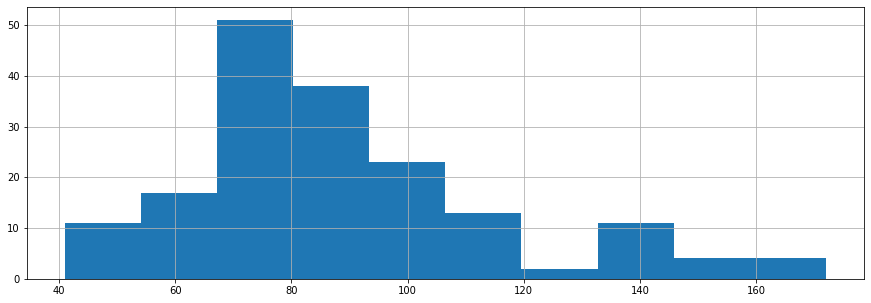

In [19]:
df_dur['duracion'].hist(figsize=(15,5));

Para finalizar, creamos un archivo de Excel con nuestro catálogo:

In [20]:
catalogo.to_excel('catalogo_teatrix.xlsx')